In [1]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [2]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [3]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [4]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    
    f="helvetica_bold"
    
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=12) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 

    
    if (!is.null(title)) {
        p = p 
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [5]:
get_plots <- function(subcluster_base_path, input_ls, annotations, ymax, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    print("new")
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=-0.01, ymax=ymax, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

In [6]:
get_plots1 <- function(subcluster_base_path, input_ls, annotations, ymax, ymaxn, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    print("new")
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
        
        if (max(submotif)>(ymaxn)){
            ymax1=ymax}
        else{
            ymax1=ymaxn}
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=-0.01, ymax=ymax1, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

[1] "new"
[1] 0.069727
[1] 0.045034
[1] 0.07141
[1] 0.049046
[1] 0.052222
[1] 0.038185
[1] 0.045821
[1] 0.075663
[1] 0.04182
[1] 0.053412
[1] "new"
[1] 0.056546
[1] 0.065166
[1] 0.063337
[1] 0.053294
[1] 0.048533
[1] 0.05346
[1] 0.074365
[1] 0.040122
[1] 0.045658
[1] 0.046881
[1] "new"
[1] 0.087596
[1] 0.093934
[1] 0.048705
[1] 0.065614
[1] 0.060311
[1] 0.059214
[1] 0.04926
[1] 0.066493
[1] 0.058724
[1] 0.048687
[1] "new"
[1] 0.082199
[1] 0.048146
[1] 0.035022
[1] 0.043151
[1] 0.034004
[1] 0.038213
[1] 0.038279
[1] 0.033736
[1] 0.037005
[1] 0.038172
[1] "new"
[1] 0.105478
[1] 0.081558
[1] 0.079378
[1] 0.064969
[1] 0.053238
[1] 0.062009
[1] 0.070053
[1] 0.057137
[1] 0.073938
[1] 0.064774


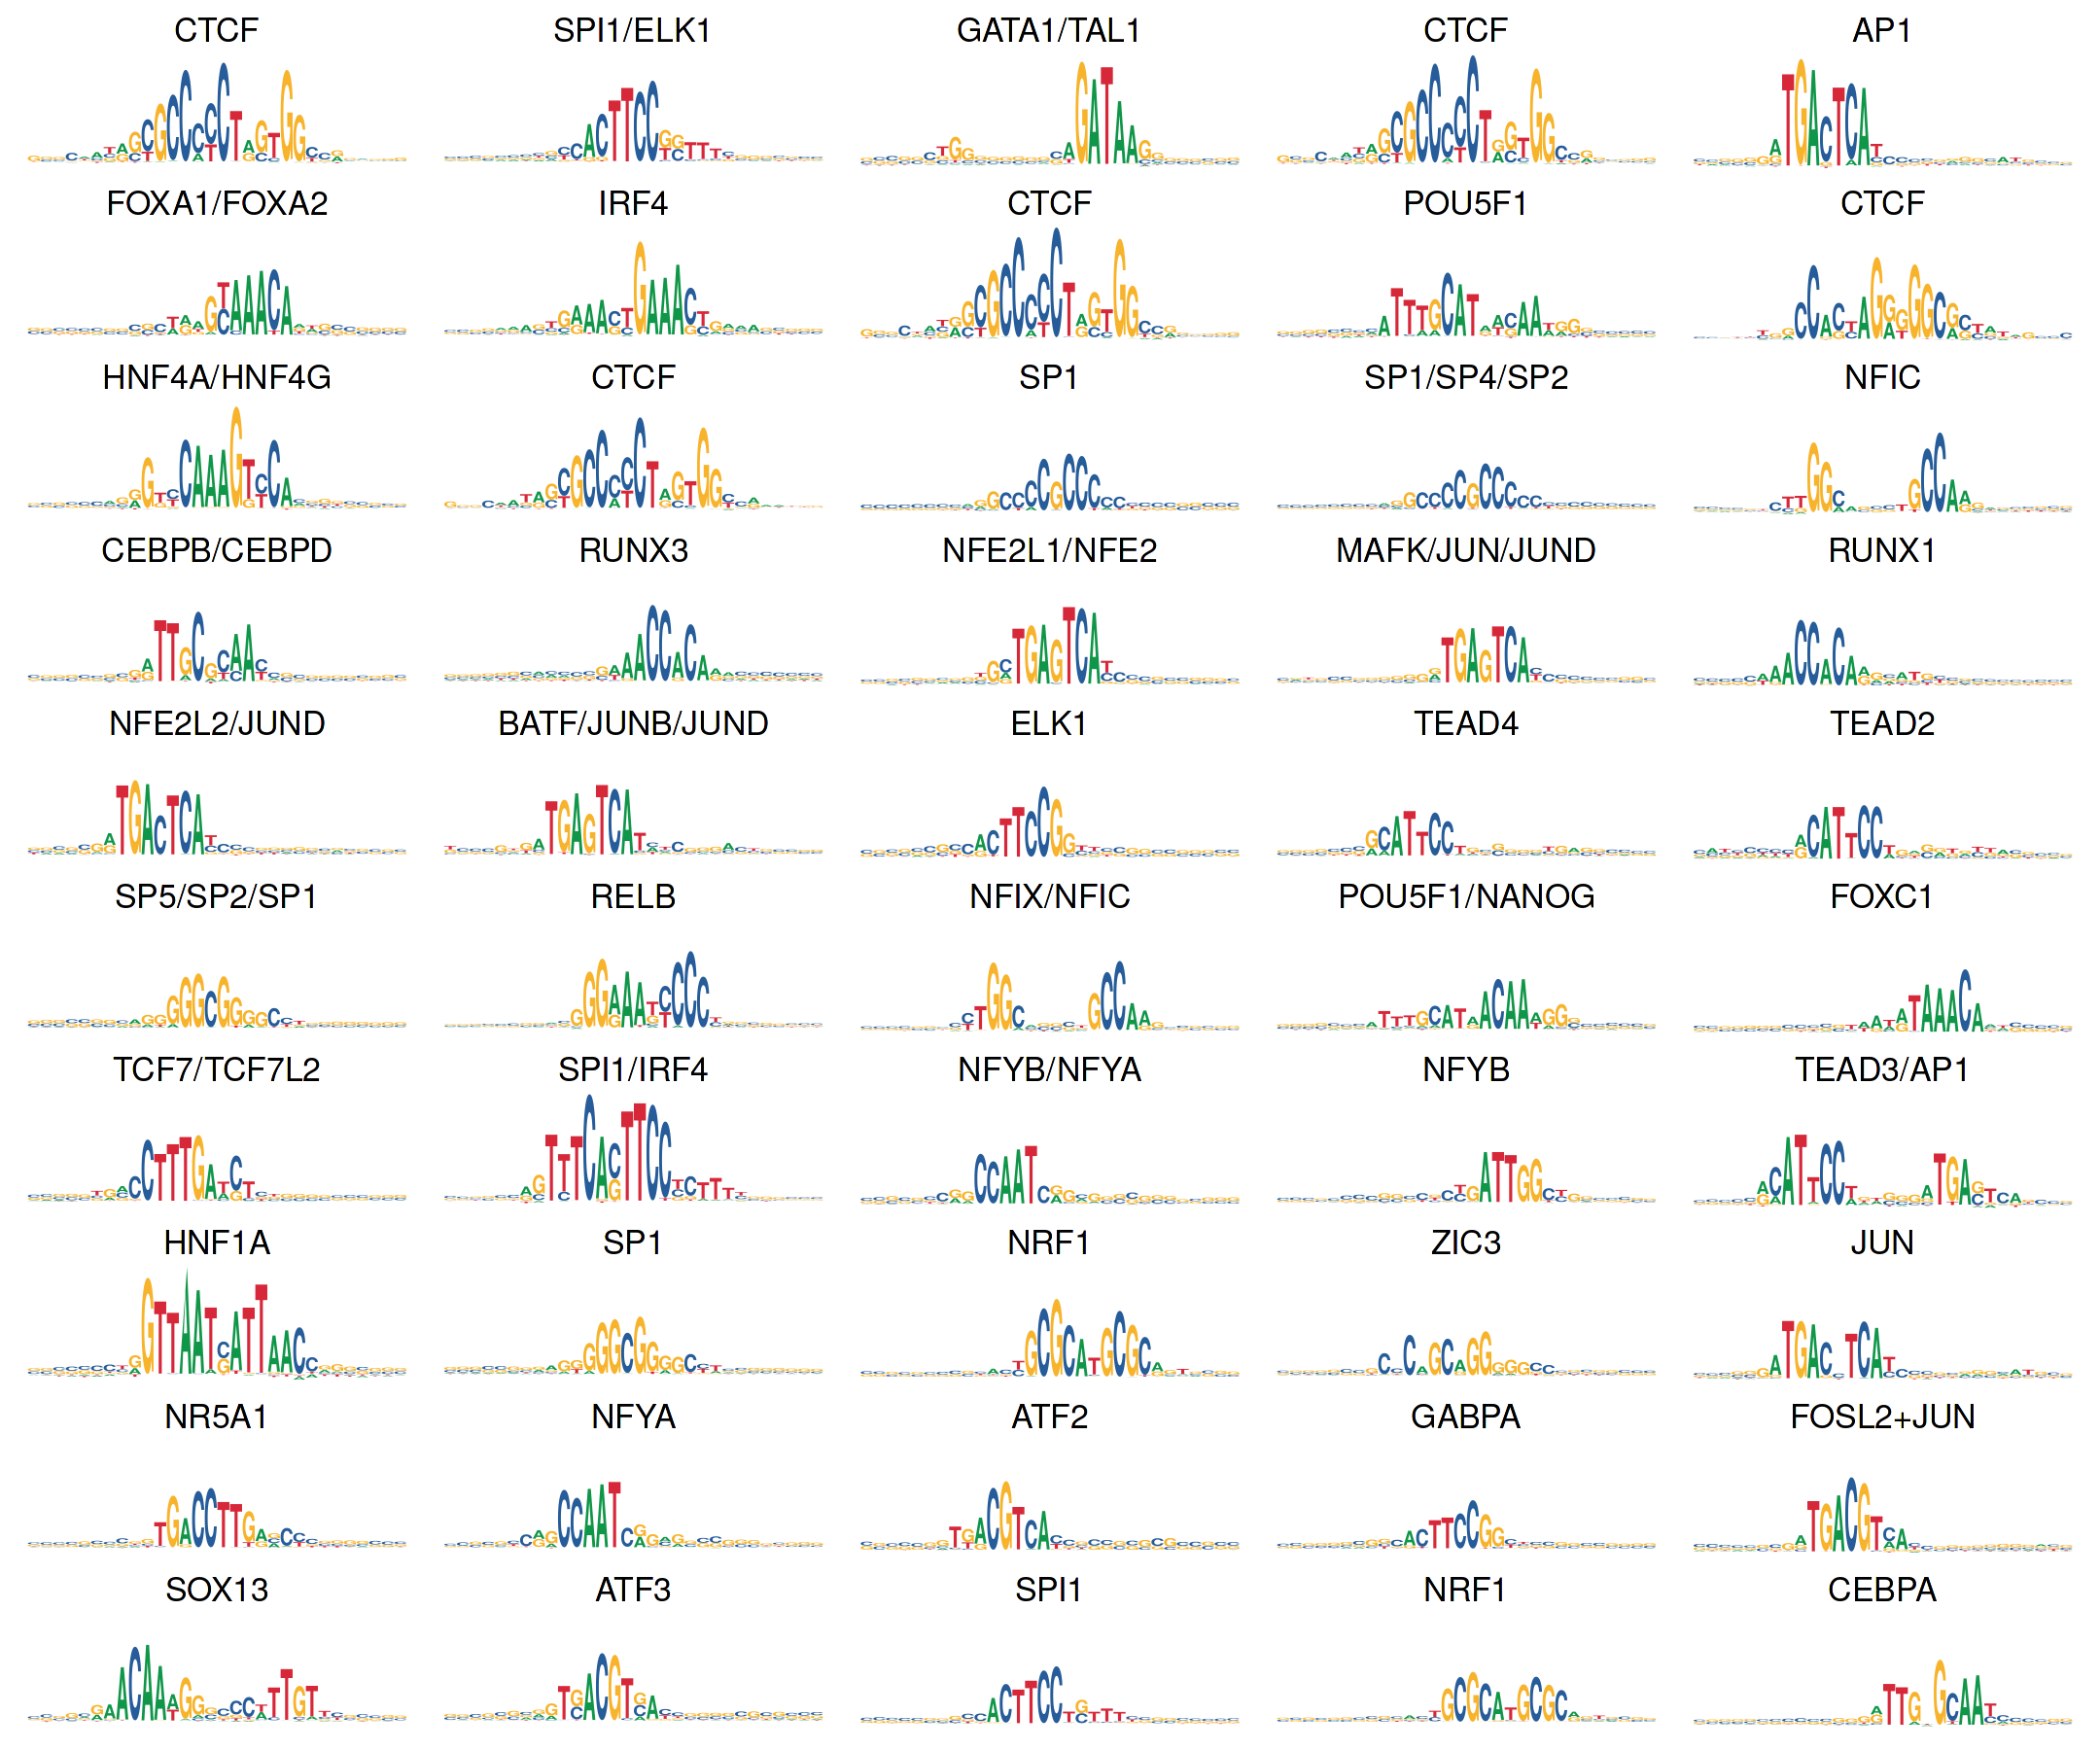

In [14]:

options(repr.plot.width = 18, repr.plot.height = 15)

atac_annotations = read.table("../oct_24_2024/DNASE/HEPG2/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots = get_plots("../oct_24_2024/DNASE/HEPG2/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.075663)

atac_annotations = read.table("../oct_24_2024/DNASE/GM12878/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots1 = get_plots("../oct_24_2024/DNASE/GM12878/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.075)

atac_annotations = read.table("../oct_24_2024/DNASE/K562/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots2 = get_plots("../oct_24_2024/DNASE/K562/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.094)

atac_annotations = read.table("../oct_24_2024/DNASE/H1ESC/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots3 = get_plots("../oct_24_2024/DNASE/H1ESC/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.083)


atac_annotations = read.table("../oct_24_2024/DNASE/IMR90/counts_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots4 = get_plots("../oct_24_2024/DNASE/IMR90/counts_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.111)

#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(append(append(append(append(all_plots, all_plots1), all_plots2), all_plots3), all_plots4), nrow=10, byrow=FALSE)

ggsave("subfigs/dnase_compare_top_10_modisco_counts_oct_24_2024.pdf", device = "pdf",  width = 18, height = 15, dpi = 300)


In [ ]:

options(repr.plot.width = 18, repr.plot.height = 15)

atac_annotations = read.table("../oct_24_2024/DNASE/HEPG2/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots = get_plots1("../oct_24_2024/DNASE/HEPG2/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.020798, ymaxn=0.04)

atac_annotations = read.table("../oct_24_2024/DNASE/GM12878/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots1 = get_plots1("../oct_24_2024/DNASE/GM12878/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.035458, ymaxn=0.010525)

atac_annotations = read.table("../oct_24_2024/DNASE/K562/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots2 = get_plots1("../oct_24_2024/DNASE/K562/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.027318, ymaxn=0.06)

atac_annotations = read.table("../oct_24_2024/DNASE/H1ESC/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots3 = get_plots1("../oct_24_2024/DNASE/H1ESC/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.019743, ymaxn=0.026)


atac_annotations = read.table("../oct_24_2024/DNASE/IMR90/profile_annotations.tsv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots4 = get_plots1("../oct_24_2024/DNASE/IMR90/profile_0_%d.pfm", seq(0,9), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F,ymax=0.030718, ymaxn=0.052)

#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(append(append(append(append(all_plots, all_plots1), all_plots2), all_plots3), all_plots4), nrow=10, byrow=FALSE)

ggsave("subfigs/dnase_compare_top_10_modisco_profile_oct_24_2024.pdf", device = "pdf",  width = 18, height = 15, dpi = 300)


[1] "new"
[1] 0.038153
[1] 0.015415
[1] 0.021552
[1] 0.017711
[1] 0.011344
[1] 0.015734
[1] 0.009491
[1] 0.014754
[1] 0.01458
[1] 0.020207
[1] "new"
[1] 0.032385
[1] 0.012896
[1] 0.010582
[1] 0.010637
[1] 0.010022
[1] 0.009178
[1] 0.009749
[1] 0.014478
[1] 0.010209
[1] 0.011843
[1] "new"
[1] 0.021441
[1] 0.059135
[1] 0.014882
[1] 0.020183
[1] 0.012941
[1] 0.014219
[1] 0.027316
[1] 0.015958
[1] 0.004597
[1] 0.01949
[1] "new"
[1] 0.025956
[1] 0.008035
[1] 0.005036
[1] 0.007082
[1] 0.009373
[1] 0.0089
[1] 0.009929
[1] 0.00715
[1] 0.008857
[1] 0.007551
[1] "new"
[1] 0.039147
[1] 0.051103
[1] 0.033188
[1] 0.019975
[1] 0.015333
[1] 0.019359
[1] 0.01408
[1] 0.021569
[1] 0.014259
[1] 0.025414
